In [30]:
import pandas as pd

df = pd.read_parquet("./data/filtered_news_with_topics.parquet")

df.head()

url        date language  \
0   http://galusaustralis.com/2020/02/486473/legal...  2020-02-26       en   
2   http://www.agoravox.it/Covid-19-un-messaggio-d...  2020-03-13       en   
7   http://www.sbwire.com/press-releases/healthcar...  2022-10-06       en   
14  https://agenparl.eu/funding-boost-for-artifici...  2020-08-28       en   
18  https://asapland.com/one-punch-man-a-fan-imagi...  2020-07-24       en   

                                                title  \
0   LegalTech Artificial Intelligence Market 2019 ...   
2   Covid-19: un messaggio dai ricercatori italian...   
7   Healthcare Artificial Intelligence Market Anal...   
14  Funding boost for artificial intelligence in N...   
18  One Punch Man: a fan imagined King in reality ...   

                                                 text  token_count  \
0   LegalTech Artificial Intelligence Market 2019 ...          951   
2   \n\n\nCovid-19: un messaggio dai ricercatori i...         2055   
7   \n\nHealthcare Artificial Intelligence Market ...          804   
14  \nFunding boost for artificial intelligence in...         1601   
18  One Punch Man: a fan imagined King in reality ...          804   

                                         cleaned_text  topic_num  topic_name  
0   LegalTech AI Market 2019 Technology Advancemen...         20       Legal  
2   Covid-19: un messaggio dai ricercatori italian...          0  Healthcare  
7   Healthcare AI Market Analysis and Forecast for...          0  Healthcare  
14  Funding boost for AI in NHS to speed up diagno...          0  Healthcare  
18  One Punch Man: a fan imagined King in reality ...          6         Art

In [31]:
df["topic_name"].unique()

array(['Legal', 'Healthcare', 'Art', 'AutomotiveEnergy', 'Marketing',
       'Music', 'Education', 'Government', 'Sports', 'Cybersecurity',
       'Film'], dtype=object)

8492 3844


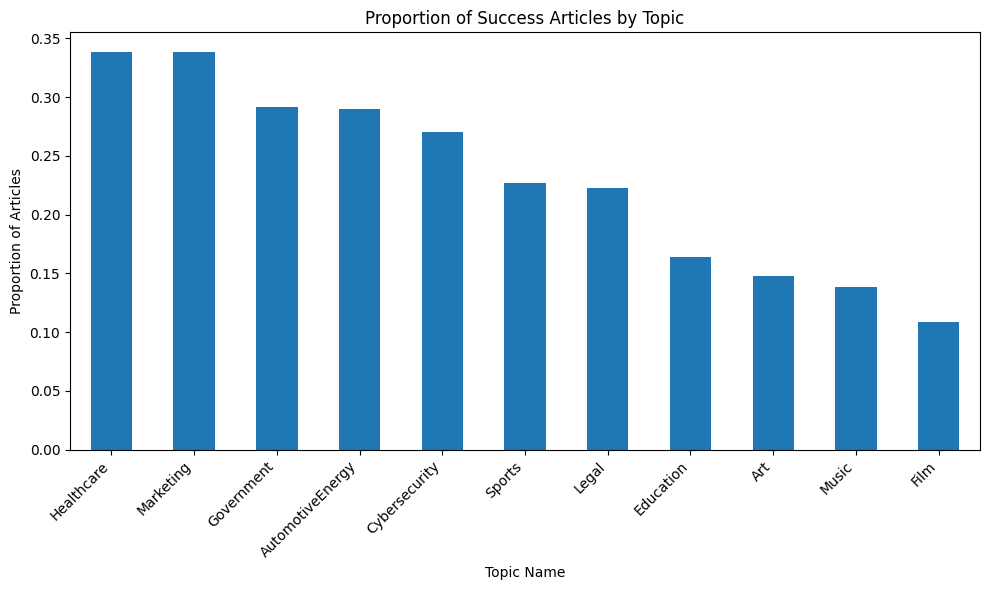

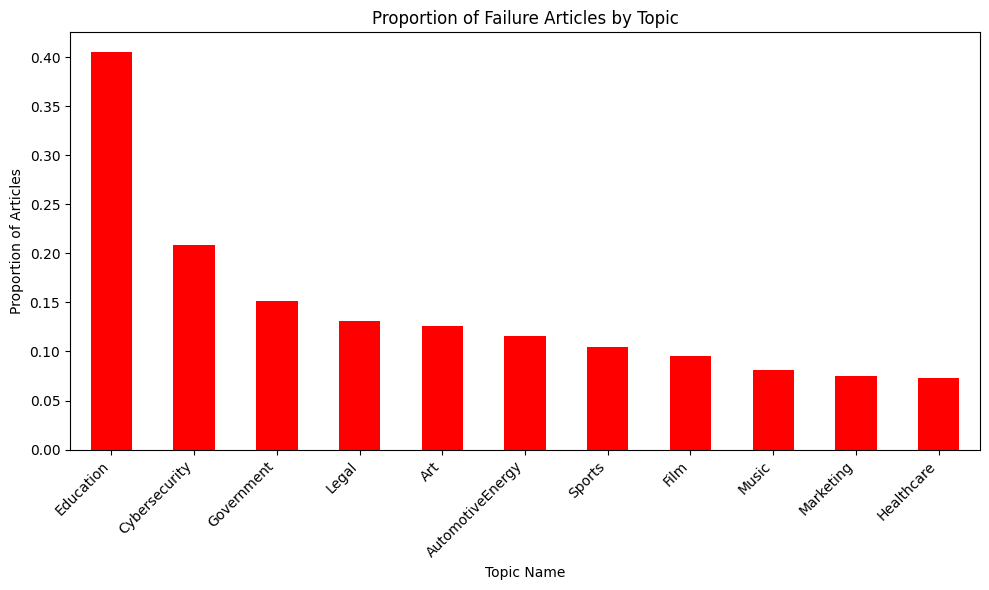

CPU times: user 51.7 s, sys: 392 ms, total: 52.1 s
Wall time: 51.5 s


In [32]:
%%time

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame loaded from the "filtered_news_with_topics.parquet" file

# Success Stories Keyword List
success_keywords = [
    "successful implementation", "overachieved", "profit increase", "revenue growth",
    "efficiency gains", "breakthrough", "innovation", "award-winning", "market leader",
    "expansion", "funding secured", "partnership announced", "patent granted",
    "positive impact", "exceeded expectations", "IPO", "scaling", "venture capital",
    "strategic investment", "leading edge", "milestone reached", "record-breaking",
    "pioneering", "game-changing", "disruptive", "cutting-edge", "revolutionary",
    "successful launch", "market dominance", "significant growth", "industry first",
    "raised funding", "leading innovation", "set a record", "market breakthrough",
    "high demand", "outperformed", "partnership success", "award recognition",
    "technology adoption", "user growth", "revenue surge", "profitable quarter",
    "successful integration", "customer satisfaction", "enhanced capabilities",
    "improved efficiency", "brand enhancement", "share price increase", "investor interest"
]


# Failures Keyword List
# Failures Keyword List
failure_keywords = [
    "fail", "failed", "failure", "failed implementation", "shutdown", "bankruptcy",
    "project cancellation", "below expectations", "technical difficulties", "layoffs",
    "funding withdrawn", "cheating", "cheat", "partnership dissolved", "market withdrawal",
    "losses", "product recall", "legal challenge", "ethical concerns", "privacy breach",
    "security flaw", "negative impact", "criticism", "controversy", "scaling back",
    "abandoned", "suspended", "halted", "withdrawn", "scrapped", "failure to launch",
    "operational challenges", "financial difficulties", "underperformed", "regulatory hurdles",
    "unmet goals", "product defects", "investigation opened", "safety concerns",
    "data breach", "public backlash", "recalled product", "loss of confidence",
    "stock price fall", "investor withdrawal", "unsustainable", "reputation damage",
    "customer complaints", "legal action", "regulatory non-compliance", "environmental impact",
    "ethical backlash", "security incident", "mismanagement", "market rejection"
]



# Filter DataFrames based on the presence of keywords in 'cleaned_text'
# Adjusting to case-insensitive filtering for success and failure keywords
success_df = df[df['cleaned_text'].apply(lambda x: any(keyword.lower() in x.lower() for keyword in success_keywords))]
failure_df = df[df['cleaned_text'].apply(lambda x: any(keyword.lower() in x.lower() for keyword in failure_keywords))]


print(len(success_df), len(failure_df))



# Recalculate counts within each topic for success and failure DataFrames
success_counts = success_df['topic_name'].value_counts()
failure_counts = failure_df['topic_name'].value_counts()

# Calculate the total number of articles per topic
total_articles_per_topic = df['topic_name'].value_counts()

# Calculate proportions
success_proportions = (success_counts / total_articles_per_topic).fillna(0).sort_values(ascending=False)
failure_proportions = (failure_counts / total_articles_per_topic).fillna(0).sort_values(ascending=False)


# Step 3: Plotting success stories bar chart with proportions
plt.figure(figsize=(10, 6))
success_proportions.plot(kind='bar')
plt.title('Proportion of Success Articles by Topic')
plt.xlabel('Topic Name')
plt.ylabel('Proportion of Articles')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plotting failure stories bar chart with proportions
plt.figure(figsize=(10, 6))
failure_proportions.plot(kind='bar', color='red')
plt.title('Proportion of Failure Articles by Topic')
plt.xlabel('Topic Name')
plt.ylabel('Proportion of Articles')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# # Count articles within each topic for success and failure DataFrames
# success_counts = success_df['topic_name'].value_counts().sort_values(ascending=False)
# failure_counts = failure_df['topic_name'].value_counts().sort_values(ascending=False)

# # Plotting success stories bar chart
# plt.figure(figsize=(10, 6))
# success_counts.plot(kind='bar')
# plt.title('Number of Articles by Topic - Success Stories')
# plt.xlabel('Topic Name')
# plt.ylabel('Article Count')
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()

# # Plotting failure stories bar chart
# plt.figure(figsize=(10, 6))
# failure_counts.plot(kind='bar', color='red')
# plt.title('Number of Articles by Topic - Failure Stories')
# plt.xlabel('Topic Name')
# plt.ylabel('Article Count')
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()


<Figure size 1200x800 with 0 Axes>

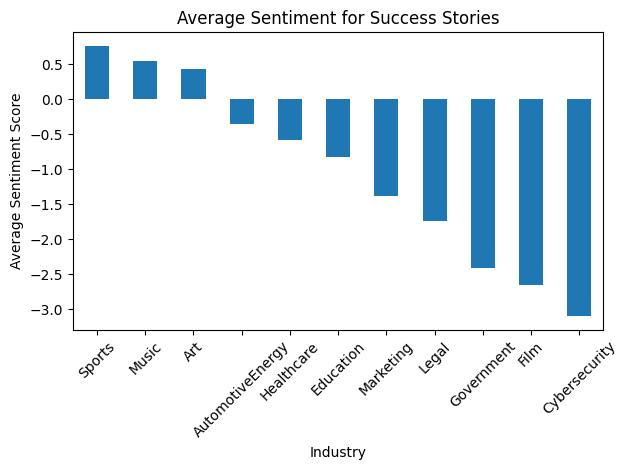

<Figure size 1200x800 with 0 Axes>

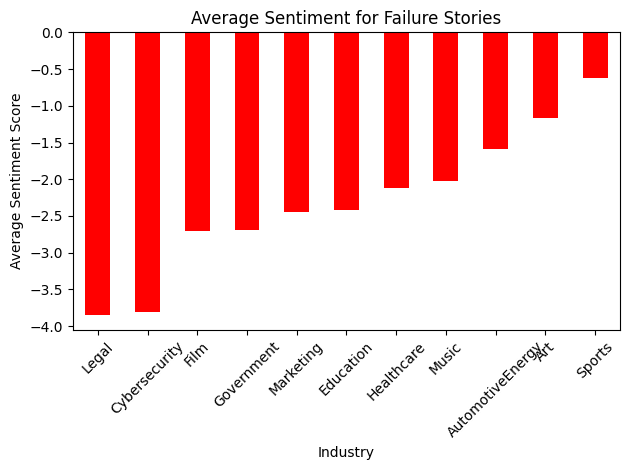

In [49]:
# %%time

# from collections import Counter
# import pandas as pd
# import spacy

# # Load the SpaCy model with specific components disabled to speed up processing
# nlp = spacy.load("en_core_web_md")

# # Add the 'sentencizer' component to the pipeline for sentence boundary detection
# # nlp.add_pipe('sentencizer')



# def filter_articles_by_keywords(df, keywords):
#     """
#     Filters the DataFrame for articles containing any of the specified keywords and returns the filtered DataFrame.
    
#     Parameters:
#     - df: The articles DataFrame.
#     - keywords: A list of keywords to filter articles by.
    
#     Returns:
#     A tuple where the first element is a filtered DataFrame containing only articles with the specified keywords, and the second element is a list of indices for these articles.
#     """
#     mask = df['cleaned_text'].apply(lambda x: any(keyword.lower() in x.lower() for keyword in keywords))
#     return df[mask], df[mask].index.tolist()

# def get_top_entities_and_store_articles_by_industry_and_keywords(df, industry, keywords, nlp, entity_types=["ORG"], top_n=20):
#     """
#     For a given industry and set of keywords, finds the top entities of specified types and stores the corresponding articles.
    
#     Parameters:
#     - df: The articles DataFrame.
#     - industry: The industry to filter by.
#     - keywords: Keywords to filter articles for success or failure stories.
#     - nlp: The SpaCy language model.
#     - entity_types: Types of entities to search for.
#     - top_n: Number of top entities to return.
    
#     Returns:
#     A tuple with the first element being a DataFrame of the top entities for the specified industry and keywords, and the second element being the DataFrame of filtered articles.
#     """
#     filtered_df, _ = filter_articles_by_keywords(df[df['topic_name'] == industry], keywords)
#     entity_counters = {etype: Counter() for etype in entity_types}
    
#     for doc in nlp.pipe(filtered_df['cleaned_text']):
#         for etype in entity_types:
#             entities = [ent.text for ent in doc.ents if ent.label_ == etype]
#             entity_counters[etype].update(entities)
    
#     # For each entity type, create a DataFrame of the top entities
#     entity_dfs = []
#     for etype, counter in entity_counters.items():
#         df_temp = pd.DataFrame(counter.most_common(top_n), columns=[f'{etype}_Entity', f'{etype}_Count'])
#         entity_dfs.append(df_temp)
    
#     # Concatenate the entity DataFrames horizontally
#     final_df = pd.concat(entity_dfs, axis=1)
#     final_df['Industry'] = industry  # Add a column for the industry
    
#     return final_df, filtered_df




# # Assuming your DataFrame df has 'topic_name' and 'cleaned_text' columns
# industries = df['topic_name'].unique()
# success_entities_df_list = []
# failure_entities_df_list = []
# success_articles_df_list = []
# failure_articles_df_list = []

# for industry in industries:
#     success_entities, success_articles = get_top_entities_and_store_articles_by_industry_and_keywords(df, industry, success_keywords, nlp)
#     failure_entities, failure_articles = get_top_entities_and_store_articles_by_industry_and_keywords(df, industry, failure_keywords, nlp)
    
#     success_entities_df_list.append(success_entities)
#     failure_entities_df_list.append(failure_entities)
#     success_articles_df_list.append(success_articles)
#     failure_articles_df_list.append(failure_articles)

# # Combine all industries' data into single DataFrames
# success_entities_df = pd.concat(success_entities_df_list, ignore_index=True)
# failure_entities_df = pd.concat(failure_entities_df_list, ignore_index=True)
# success_articles_df = pd.concat(success_articles_df_list, ignore_index=True)
# failure_articles_df = pd.concat(failure_articles_df_list, ignore_index=True)

# print(len(success_entities_df))
# print(len(failure_entities_df))
# print(len(success_articles_df))
# print(len(failure_articles_df))

# # Save to CSV or handle as needed
# success_entities_df.to_csv("./data/success_entities_all_industries.csv", index=False)
# failure_entities_df.to_csv("./data/failures_entities_all_industries.csv", index=False)
# success_articles_df.to_csv("./data/success_articles_all_industries.csv", index=False)
# failure_articles_df.to_csv("./data/failure_articles_all_industries.csv", index=False)




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# Load the sentiment analysis model
sentiment_model = joblib.load('./models/best_sentiment_model.joblib')
vectorizer = sentiment_model.named_steps['countvectorizer']
model = sentiment_model.named_steps['sgdclassifier']  # Adjust according to your model

# Load top entities for each industry from CSV
success_entities_df = pd.read_csv("./data/success_entities_all_industries.csv")
failure_entities_df = pd.read_csv("./data/failures_entities_all_industries.csv")

# Excluded entities
excluded_entities = {"ai", "ml", "healthcare", "medical", "automotive", "ev", "senate", "administration", "house"}

# Filter out excluded entities
def filter_entities(entities_df):
    return entities_df[~entities_df['ORG_Entity'].str.lower().isin(excluded_entities)]

filtered_success_entities = filter_entities(success_entities_df)
filtered_failure_entities = filter_entities(failure_entities_df)

# Function to calculate average sentiment for articles containing top entities
def calculate_average_sentiment(articles_df, vectorizer, model):
    if articles_df.empty:
        return np.nan
    X = vectorizer.transform(articles_df['cleaned_text'])
    sentiment_scores = model.decision_function(X)
    return np.mean(sentiment_scores)

# Assuming you have DataFrames `success_articles_by_industry` and `failure_articles_by_industry` prepared
# These should contain articles for each industry that contain at least one of the top entities

# Calculate average sentiment for each industry
average_sentiment_success = {industry: calculate_average_sentiment(df, vectorizer, model) 
                             for industry, df in success_articles_by_industry.items()}
average_sentiment_failure = {industry: calculate_average_sentiment(df, vectorizer, model) 
                             for industry, df in failure_articles_by_industry.items()}

# Convert to DataFrame for plotting and sort
average_sentiment_success_df = pd.DataFrame.from_dict(average_sentiment_success, orient='index', columns=['Average Sentiment']).sort_values(by='Average Sentiment', ascending=False)
average_sentiment_failure_df = pd.DataFrame.from_dict(average_sentiment_failure, orient='index', columns=['Average Sentiment']).sort_values(by='Average Sentiment')

# Plotting
plt.figure(figsize=(12, 8))
average_sentiment_success_df.plot(kind='bar', legend=False, title='Average Sentiment for Success Stories')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
average_sentiment_failure_df.plot(kind='bar', legend=False, color='red', title='Average Sentiment for Failure Stories')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



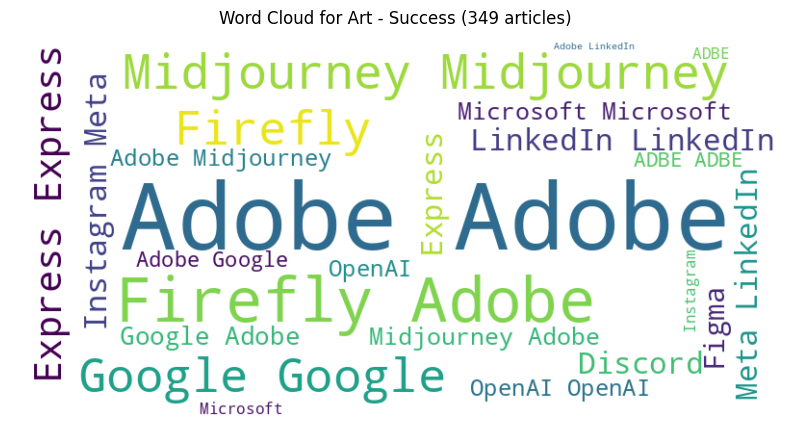

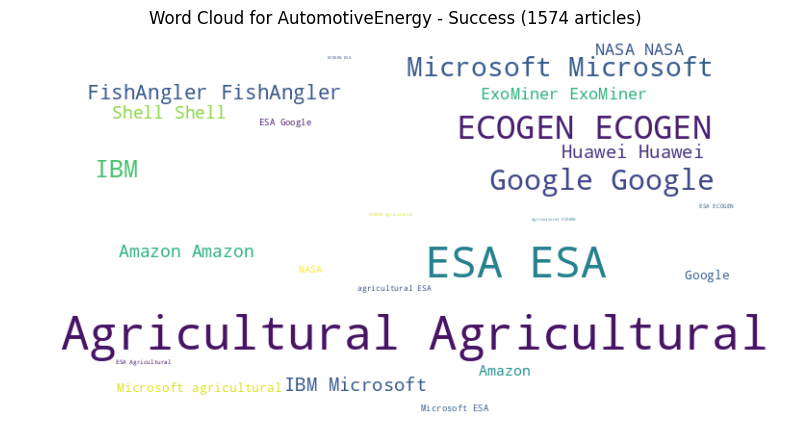

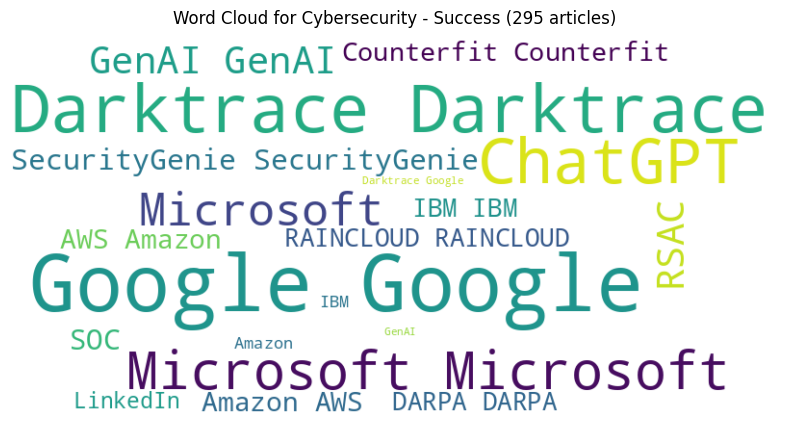

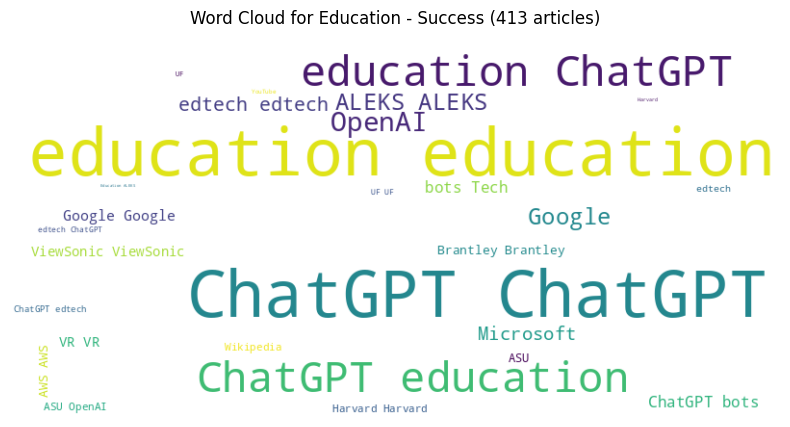

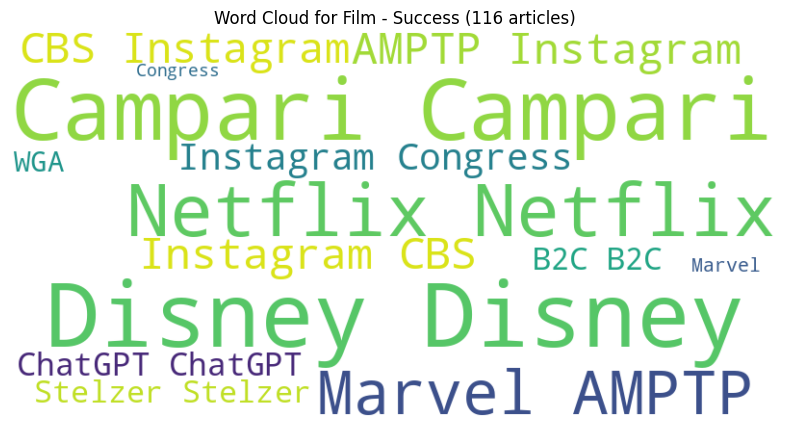

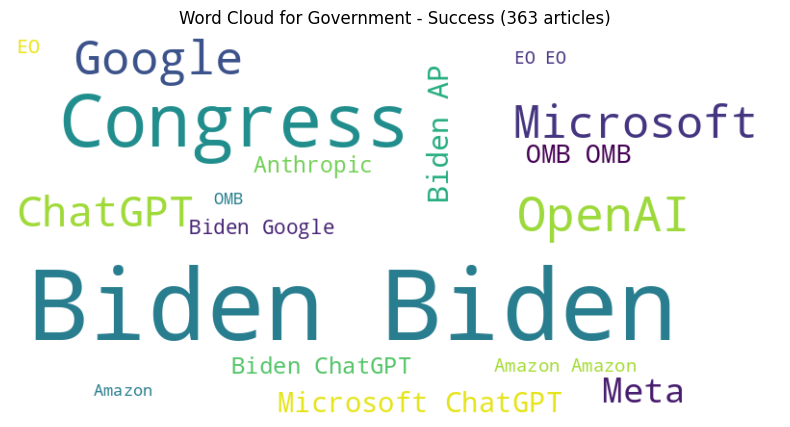

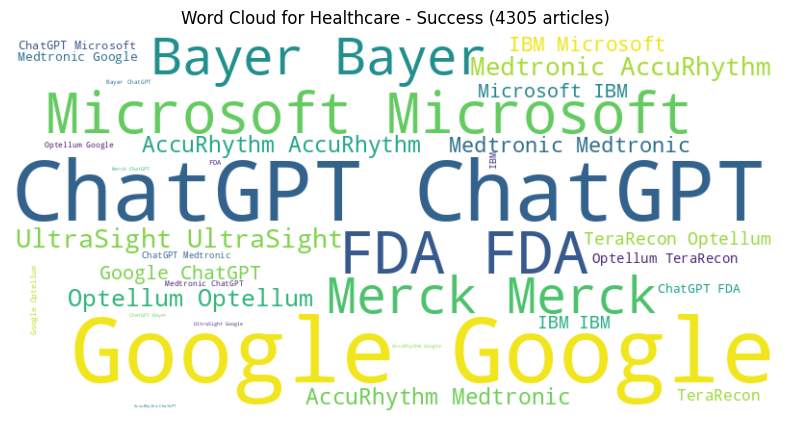

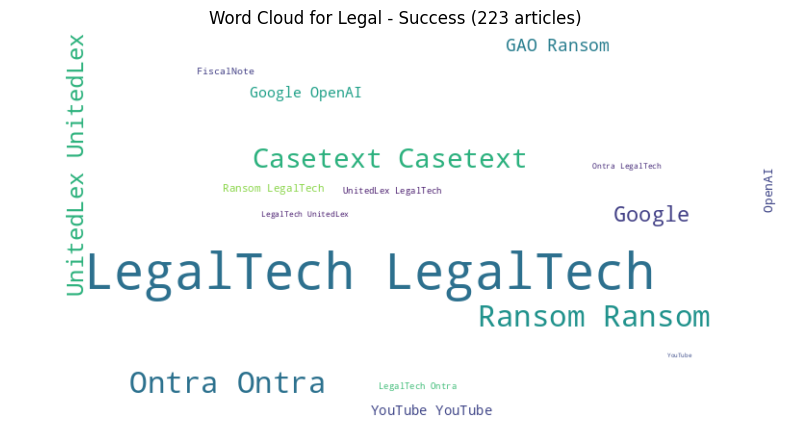

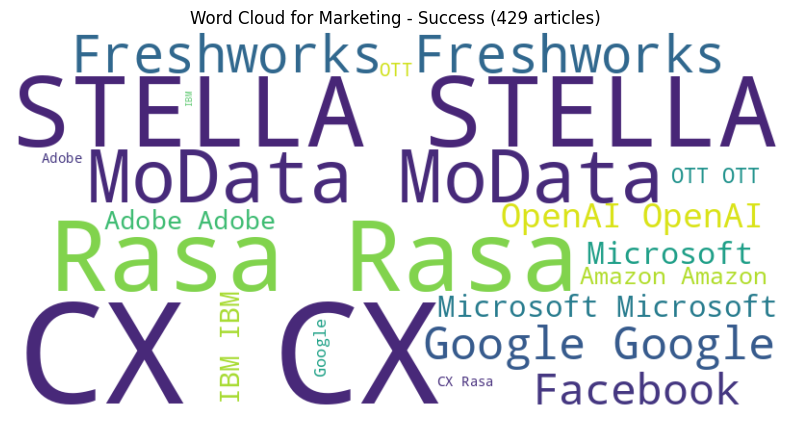

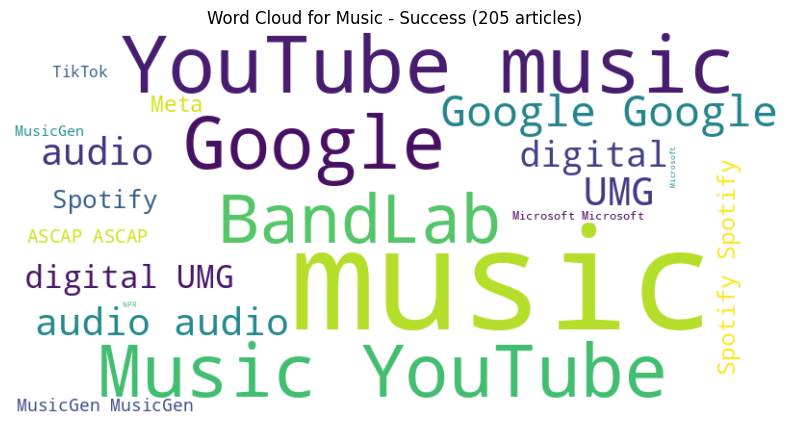

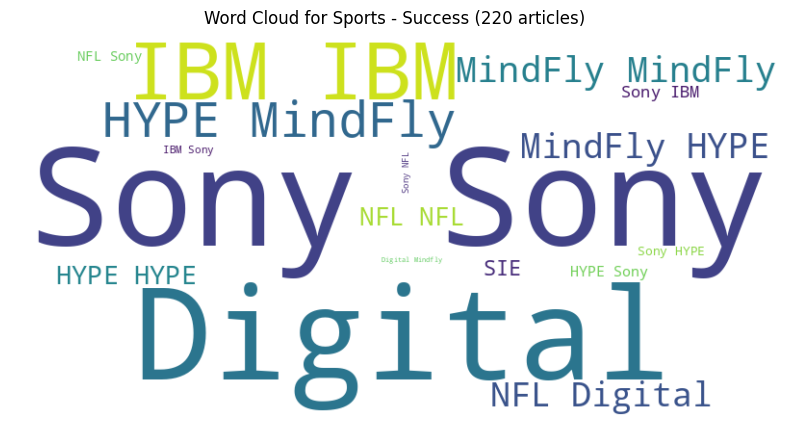

In [65]:
# # Function to generate word clouds for industries based on filtered articles containing top entities
# def generate_word_clouds(articles_df, filtered_entities_df, success_or_failure):
#     # Group by industry and get list of entities
#     top_entities_by_industry = filtered_entities_df.groupby('Industry')['ORG_Entity'].apply(list).to_dict()
    
#     for industry, entities in top_entities_by_industry.items():
#         # Filter articles for the current industry that contain at least one of the top entities
#         industry_articles = articles_df[articles_df['topic_name'] == industry]
#         industry_text = industry_articles['cleaned_text'].apply(lambda x: " ".join([word for word in x.split() if word.lower() in [entity.lower() for entity in entities]])).str.cat(sep=' ')
        
#         # Generate word cloud
#         if industry_text:  # Check if text is not empty
#             wordcloud = WordCloud(width=800, height=400, background_color='white').generate(industry_text)
#             plt.figure(figsize=(10, 5))
#             plt.imshow(wordcloud, interpolation='bilinear')
#             plt.axis('off')
#             plt.title(f'Word Cloud for {industry} - {"Success" if success_or_failure == "Success" in articles_df.columns else "Failure"}')
#             plt.show()
from wordcloud import WordCloud, STOPWORDS

# def generate_word_clouds(articles_df, filtered_entities_df, success_or_failure):
#     top_entities_by_industry = filtered_entities_df.groupby('Industry')['ORG_Entity'].apply(list).to_dict()
    
#     for industry, entities in top_entities_by_industry.items():
#         industry_articles = articles_df[articles_df['topic_name'] == industry]
#         industry_text = industry_articles['cleaned_text'].apply(lambda x: " ".join([word for word in x.split() if word.lower() in [entity.lower() for entity in entities]])).str.cat(sep=' ')
        
#         if industry_text:  # Generate word cloud if text is not empty
#             wordcloud = WordCloud(
#                 width=800,
#                 height=400,
#                 background_color='white',
#                 max_words=200,  # Increase max_words to allow for more unique words
#                 stopwords=STOPWORDS  # Ensure default stopwords are considered
#             ).generate(industry_text)
            
#             plt.figure(figsize=(10, 5))
#             plt.imshow(wordcloud, interpolation='bilinear')
#             plt.axis('off')
#             plt.title(f'Word Cloud for {industry} - {success_or_failure}')
#             plt.show()

def generate_word_clouds(articles_df, filtered_entities_df, success_or_failure):
    top_entities_by_industry = filtered_entities_df.groupby('Industry')['ORG_Entity'].apply(list).to_dict()
    
    for industry, entities in top_entities_by_industry.items():
        industry_articles = articles_df[articles_df['topic_name'] == industry]
        industry_text = industry_articles['cleaned_text'].apply(lambda x: " ".join([word for word in x.split() if word.lower() in [entity.lower() for entity in entities]])).str.cat(sep=' ')
        num_articles = len(industry_articles)  # Get the number of articles for the current industry
        
        if industry_text:  # Generate word cloud if text is not empty
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',
                max_words=200,  # Increase max_words to allow for more unique words
                stopwords=STOPWORDS  # Ensure default stopwords are considered
            ).generate(industry_text)
            
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Word Cloud for {industry} - {success_or_failure} ({num_articles} articles)')
            plt.show()


# Generate word clouds for success and failure articles
generate_word_clouds(success_articles_df, filtered_success_entities, "Success")

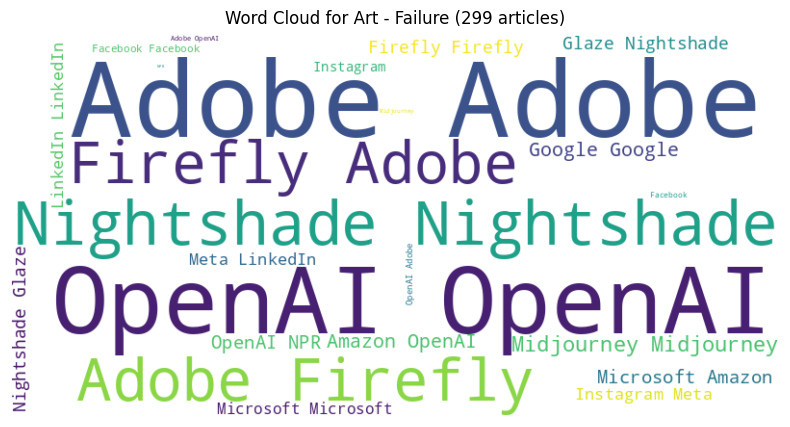

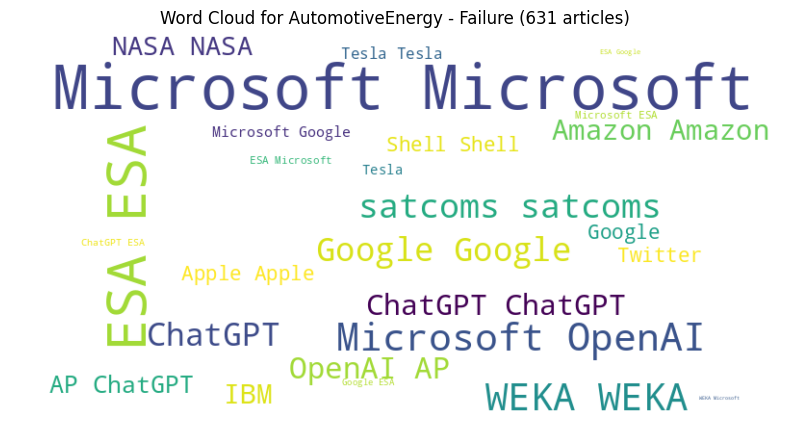

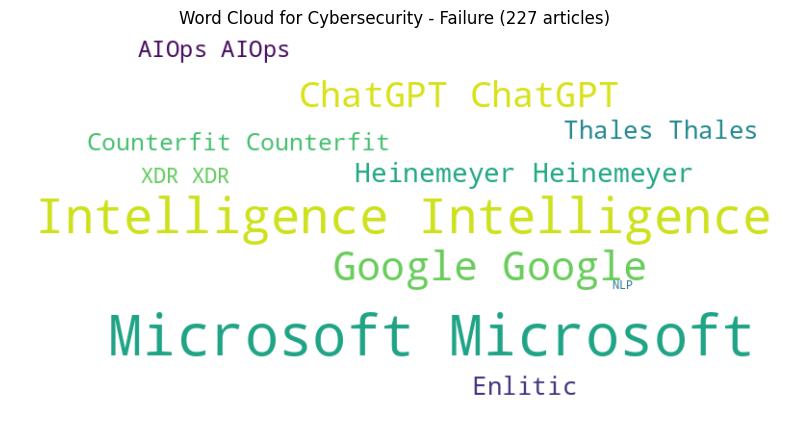

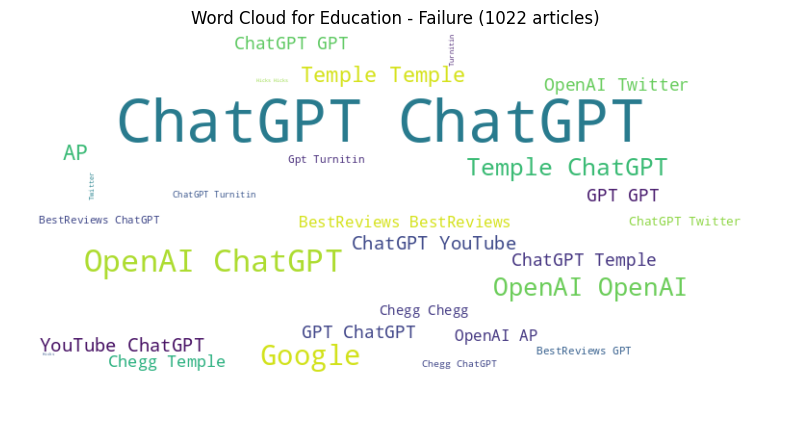

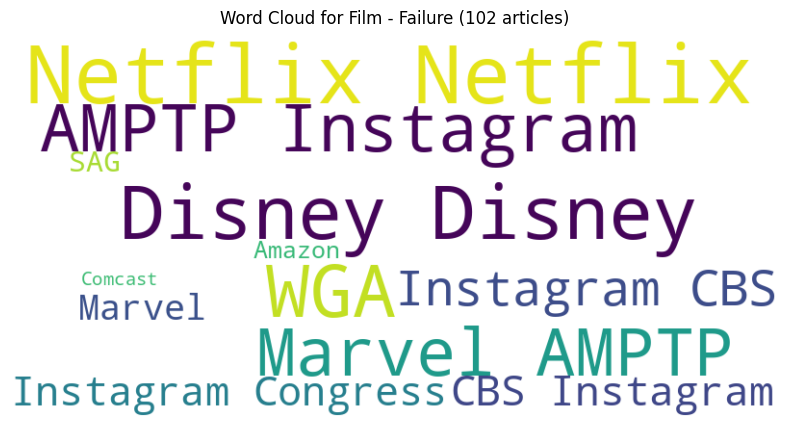

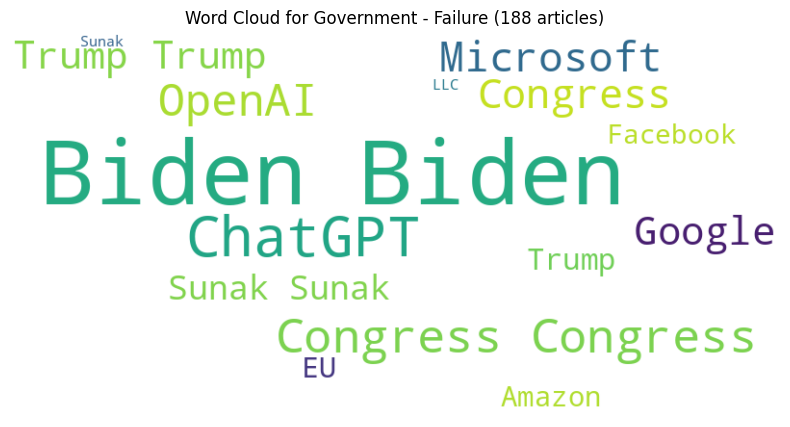

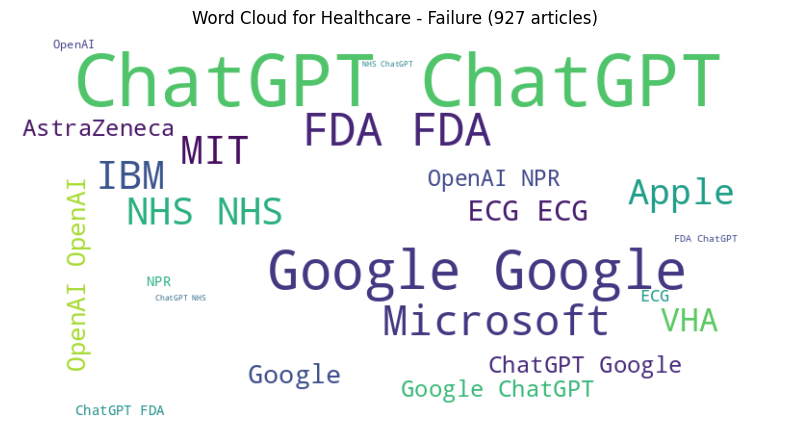

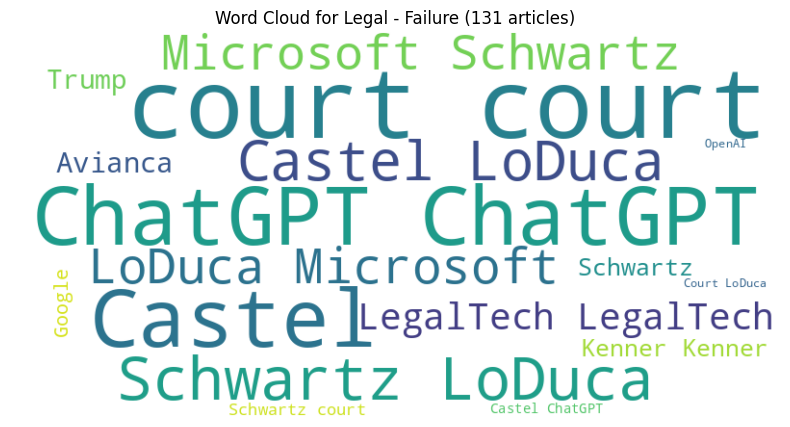

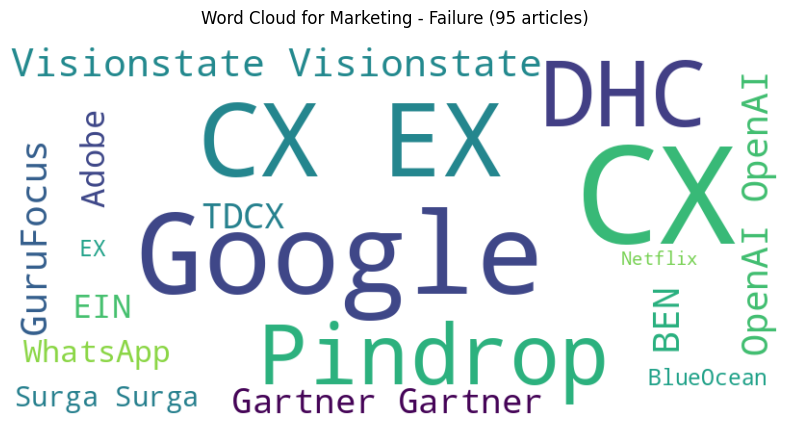

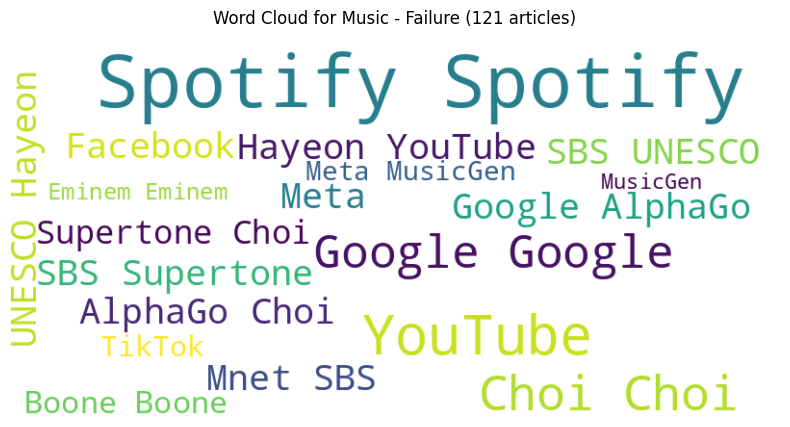

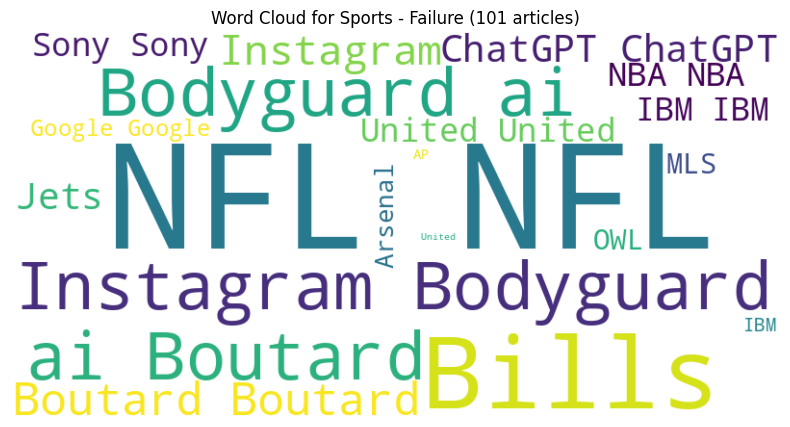

In [66]:
generate_word_clouds(failure_articles_df, filtered_failure_entities, "Failure")

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your filtered articles DataFrames (Assuming they are already filtered by top entities)
# For demonstration, replace these paths with the actual paths to your filtered articles
success_articles_df = pd.read_csv("./data/success_articles_filtered.csv")
failure_articles_df = pd.read_csv("./data/failure_articles_filtered.csv")

# Function to generate word cloud for given text data
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                          background_color ='white', 
                          min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)
    plt.show()

# Generate word clouds for each industry
def generate_industry_wordclouds(articles_df, sentiment_type):
    for industry in articles_df['Industry'].unique():
        # Concatenate all articles' text for the current industry
        text_data = ' '.join(articles_df[articles_df['Industry'] == industry]['cleaned_text'])
        generate_wordcloud(text_data, f"{sentiment_type} Articles Word Cloud - {industry}")

generate_industry_wordclouds(success_articles_df, "Success")
generate_industry_wordclouds(failure_articles_df, "Failure")


In [37]:
import joblib

# Load the sentiment analysis model
sentiment_model = joblib.load('./models/best_sentiment_model.joblib')

# Extract the CountVectorizer and the SGDClassifier from the pipeline
vectorizer = sentiment_model.named_steps['countvectorizer']
model = sentiment_model.named_steps['sgdclassifier']


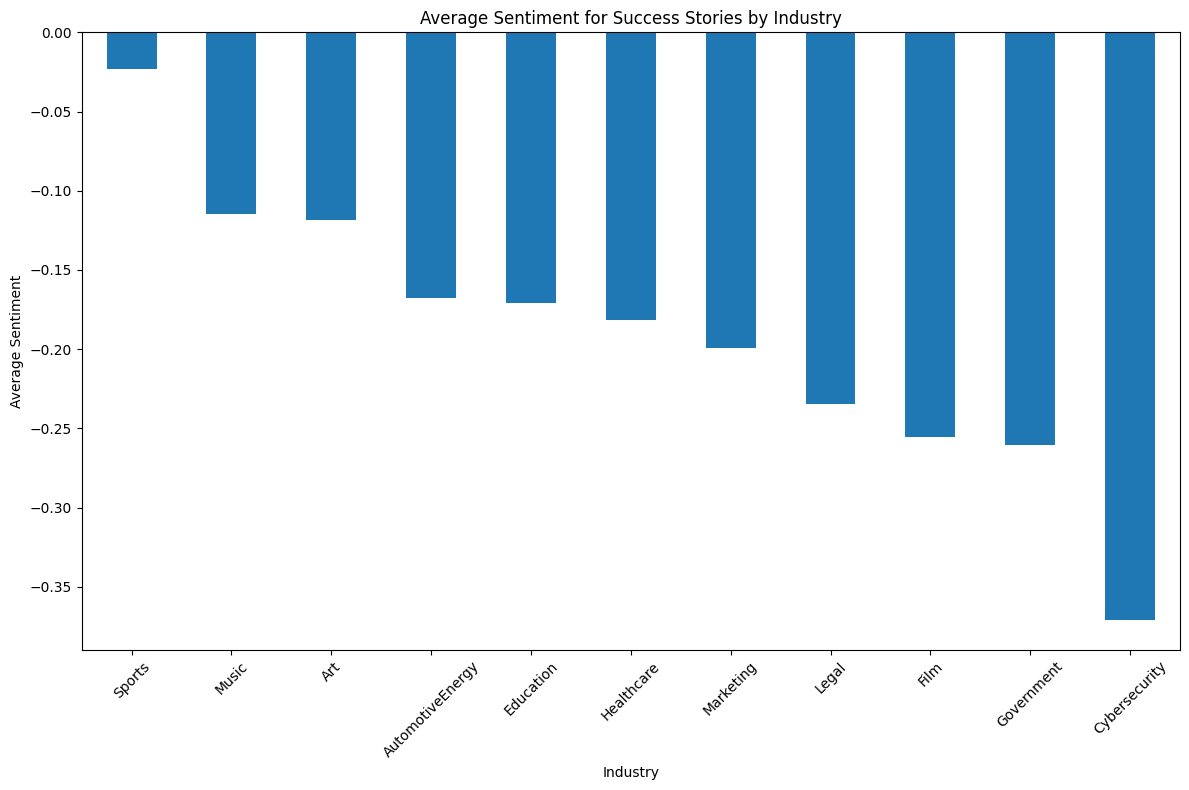

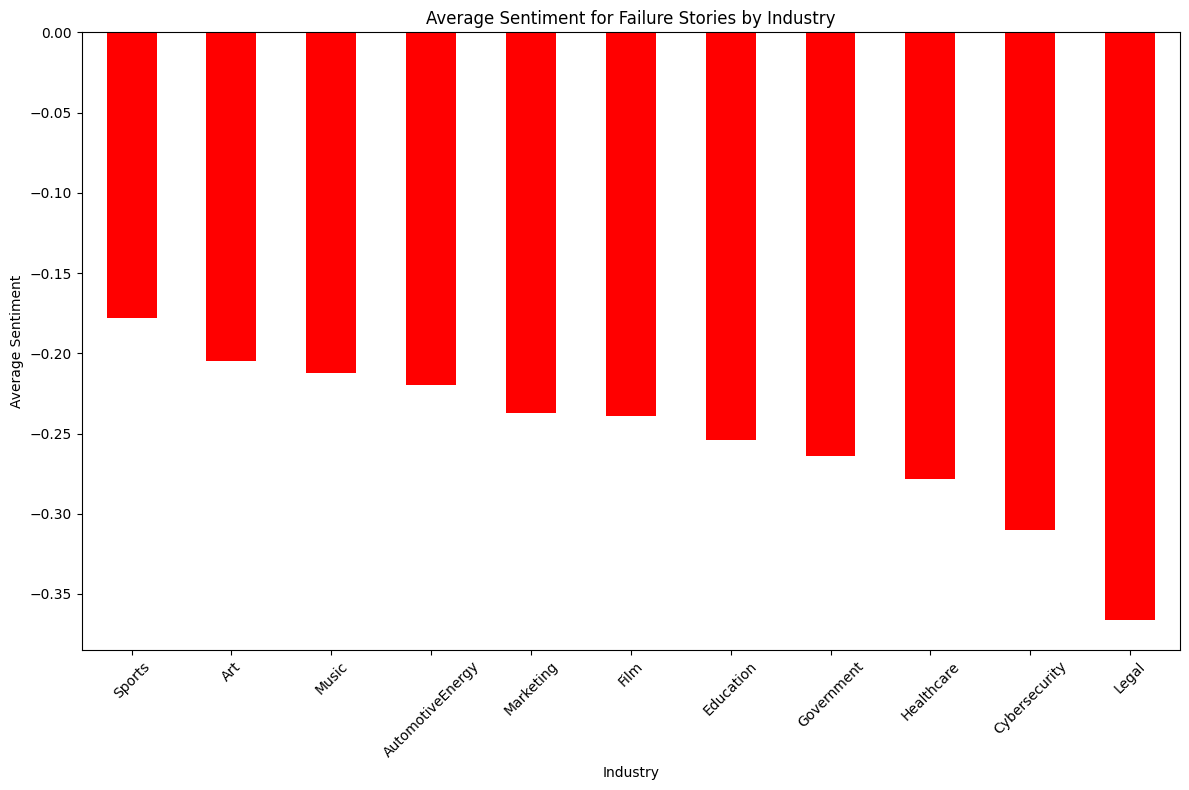

In [46]:
%%time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
import joblib

# Load NLP model and sentiment analysis model
nlp = spacy.load("en_core_web_md", disable=["tagger", "parser", "attribute_ruler", "lemmatizer"])
nlp.add_pipe("sentencizer")  # Add sentencizer for sentence boundary detection
sentiment_model = joblib.load('./models/best_sentiment_model.joblib')
vectorizer = sentiment_model.named_steps['countvectorizer']
model = sentiment_model.named_steps['sgdclassifier']  # or decision_function if applicable

# Excluded entities
excluded_entities = {"ai", "ml", "healthcare", "medical", "automotive", "ev", "senate", "administration", "house"}

# Extract top entities, excluding specific ones
def get_filtered_top_entities(entities_df):
    filtered_entities = entities_df[~entities_df['ORG_Entity'].str.lower().isin(excluded_entities)]
    return filtered_entities.groupby('Industry')['ORG_Entity'].apply(list).to_dict()

top_entities_success = get_filtered_top_entities(success_entities_df)
top_entities_failure = get_filtered_top_entities(failure_entities_df)

# Sentiment analysis function adjusted for sentence level
def calculate_average_sentiment(articles_df, vectorizer, model, top_entities):
    sentiments = []
    for _, row in articles_df.iterrows():
        doc = nlp(row['cleaned_text'])
        for sentence in doc.sents:
            if any(entity.lower() in sentence.text.lower() for entity in top_entities):
                X = vectorizer.transform([sentence.text])
                sentiment_score = model.decision_function(X)
                sentiments.append(sentiment_score.mean())
    return np.mean(sentiments) if sentiments else np.nan

# Iterate over industries and calculate average sentiment
def calculate_sentiment_by_industry(articles_by_industry, top_entities_dict):
    average_sentiment = {}
    for industry, articles_df in articles_by_industry.items():
        if industry in top_entities_dict and not articles_df.empty:
            top_entities = top_entities_dict[industry]
            average_sentiment[industry] = calculate_average_sentiment(articles_df, vectorizer, model, top_entities)
    return average_sentiment

average_sentiment_success = calculate_sentiment_by_industry(success_articles_by_industry, top_entities_success)
average_sentiment_failure = calculate_sentiment_by_industry(failure_articles_by_industry, top_entities_failure)

# Convert to DataFrame for plotting
average_sentiment_success_df = pd.DataFrame.from_dict(average_sentiment_success, orient='index', columns=['Average Sentiment']).sort_values(by='Average Sentiment', ascending=False)
average_sentiment_failure_df = pd.DataFrame.from_dict(average_sentiment_failure, orient='index', columns=['Average Sentiment']).sort_values(by='Average Sentiment', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
average_sentiment_success_df['Average Sentiment'].plot(kind='bar', title='Average Sentiment for Success Stories by Industry')
plt.ylabel('Average Sentiment')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
average_sentiment_failure_df['Average Sentiment'].plot(kind='bar', color='red', title='Average Sentiment for Failure Stories by Industry')
plt.ylabel('Average Sentiment')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
import matplotlib.pyplot as plt

# def calculate_average_sentiment(articles_df, vectorizer, model):
#     # Ensure articles_df is not empty
#     if articles_df.empty:
#         return 0
#     # Transform the text to a matrix of token counts
#     X = vectorizer.transform(articles_df['cleaned_text'])
#     # Predict sentiment scores (assuming model.predict_proba returns probabilities and taking the probability of positive class if binary classification)
#     # sentiment_scores = model.predict_proba(X)[:, 1]  # Adjust this index based on your model's positive class location
#     sentiment_scores = model.decision_function(X)[0]
#     # Calculate the average sentiment score
#     average_sentiment = sentiment_scores.mean()
#     return average_sentiment

def calculate_average_sentiment(articles_df, vectorizer, model, top_entities):
    sentiments = []
    for _, row in articles_df.iterrows():
        doc = nlp(row['cleaned_text'])
        for sentence in doc.sents:
            if any(entity in sentence.text.lower() for entity in top_entities):  # Check if sentence contains any top entity
                X = vectorizer.transform([sentence.text])
                sentiment_score = model.decision_function(X)
                sentiments.append(sentiment_score.mean())  # Assuming binary classification; adjust as needed

    return np.mean(sentiments) if sentiments else 0




# Correctly iterate over dictionaries
average_sentiment_success = {}
average_sentiment_failure = {}

# Reorganize articles by industry into dictionaries
success_articles_by_industry = {industry: df for industry, df in success_articles_df.groupby('topic_name')}
failure_articles_by_industry = {industry: df for industry, df in failure_articles_df.groupby('topic_name')}

for industry, articles_df in success_articles_by_industry.items():
    if not articles_df.empty:  # Ensure DataFrame is not empty
        average_sentiment_success[industry] = calculate_average_sentiment(articles_df, vectorizer, model)

for industry, articles_df in failure_articles_by_industry.items():
    if not articles_df.empty:  # Ensure DataFrame is not empty
        average_sentiment_failure[industry] = calculate_average_sentiment(articles_df, vectorizer, model)

# Convert to DataFrame for plotting
average_sentiment_success_df = pd.DataFrame.from_dict(average_sentiment_success, orient='index', columns=['Average Sentiment']).sort_values(by='Average Sentiment', ascending=False)
average_sentiment_failure_df = pd.DataFrame.from_dict(average_sentiment_failure, orient='index', columns=['Average Sentiment']).sort_values(by='Average Sentiment', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
average_sentiment_success_df['Average Sentiment'].plot(kind='bar', title='Average SVM Sentiment Confidence for Success Articles Containing Filtered Organization Entities by Industry', fontsize=24)
plt.ylabel('Average SVM Sentiment Confidence', fontsize=18)
plt.xlabel('Industry', fontsize=18)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

plt.figure(figsize=(12, 8))
average_sentiment_failure_df['Average Sentiment'].plot(kind='bar', color='red', title='Average SVM Sentiment Confidence for Failure Articles Containing Filtered Organization Entities by Industry', fontsize=24)
plt.ylabel('Average SVM Sentiment Confidence', fontsize=18)
plt.xlabel('Industry', fontsize=18)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()



# # Reorganize articles by industry into dictionaries
# success_articles_by_industry = {industry: df for industry, df in success_articles_df.groupby('topic_name')}
# failure_articles_by_industry = {industry: df for industry, df in failure_articles_df.groupby('topic_name')}


# def calculate_average_sentiment(articles_df, vectorizer, model):
#     # Transform the text to a matrix of token counts
#     X = vectorizer.transform(articles_df['cleaned_text'])
#     # Predict sentiment scores (assumes model.predict returns sentiment scores directly)
#     sentiment_scores = model.predict(X)
#     # Calculate the average sentiment score
#     average_sentiment = sentiment_scores.mean()
#     return average_sentiment

# # Calculate average sentiment for success articles by industry
# average_sentiment_success = {}
# average_sentiment_failure = {}
# for industry in industries:
#     # Assuming success_articles_df_list and failure_articles_df_list contain relevant articles
#     # Filter articles to exclude specific entities if necessary before this step
#     if len(success_articles_df_list) > 0:
#         average_sentiment_success[industry] = calculate_average_sentiment(success_articles_df_list[industry], vectorizer, model)
#     if len(failure_articles_df_list) > 0:
#         average_sentiment_failure[industry] = calculate_average_sentiment(failure_articles_df_list[industry], vectorizer, model)

# # Convert to DataFrame for plotting
# average_sentiment_success_df = pd.DataFrame.from_dict(average_sentiment_success, orient='index', columns=['Average Sentiment'])
# average_sentiment_failure_df = pd.DataFrame.from_dict(average_sentiment_failure, orient='index', columns=['Average Sentiment'])

# # Plotting
# plt.figure(figsize=(12, 8))
# average_sentiment_success_df['Average Sentiment'].plot(kind='bar', title='Average Sentiment for Success Articles by Industry')
# plt.ylabel('Average Sentiment Score')
# plt.xlabel('Industry')
# plt.xticks(rotation=45)
# plt.show()

# plt.figure(figsize=(12, 8))
# average_sentiment_failure_df['Average Sentiment'].plot(kind='bar', color='red', title='Average Sentiment for Failure Articles by Industry')
# plt.ylabel('Average Sentiment Score')
# plt.xlabel('Industry')
# plt.xticks(rotation=45)
# plt.show()


TypeError: calculate_average_sentiment() missing 1 required positional argument: 'top_entities'

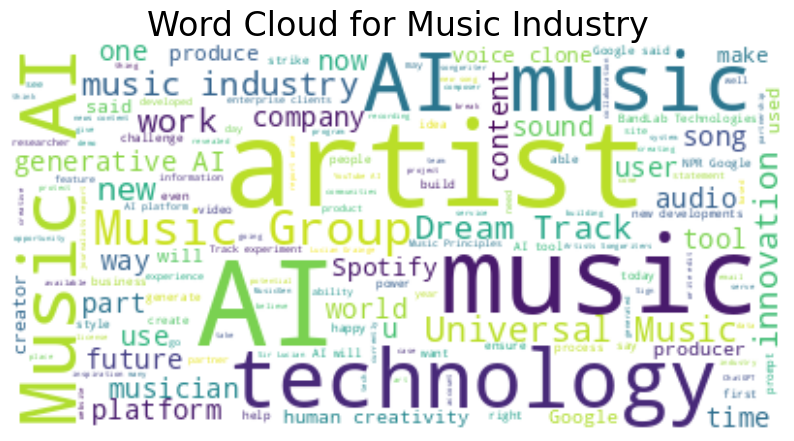

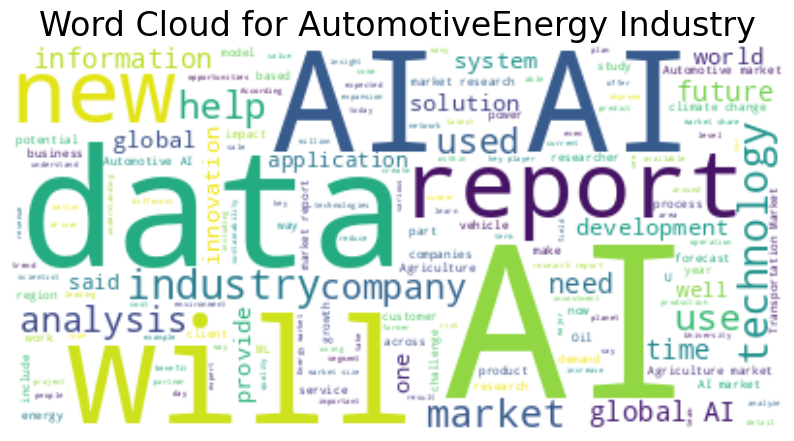

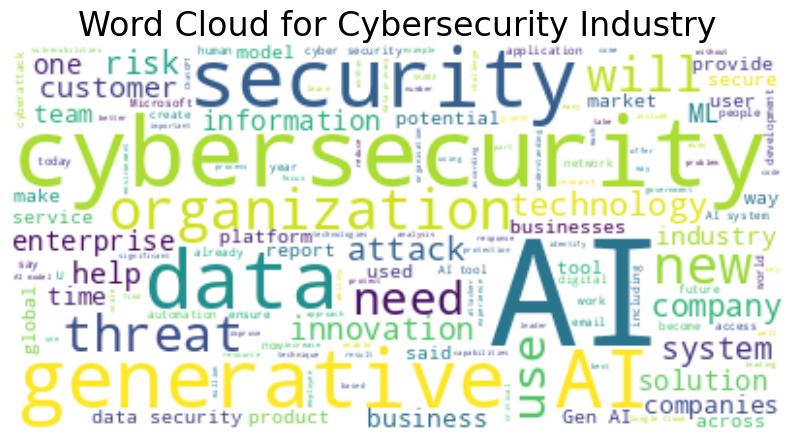

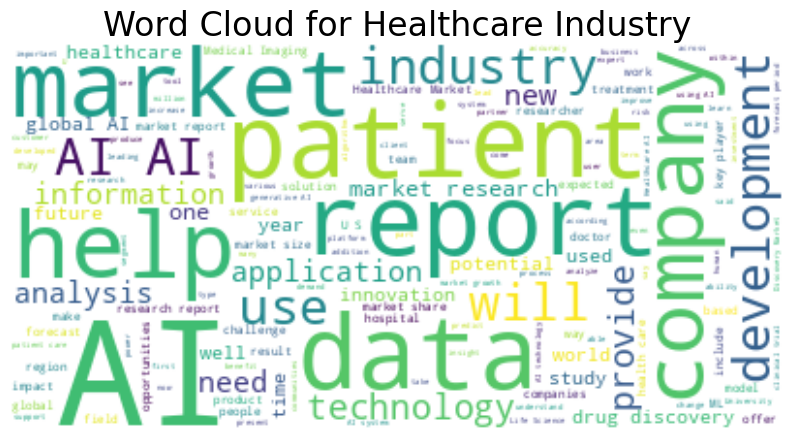

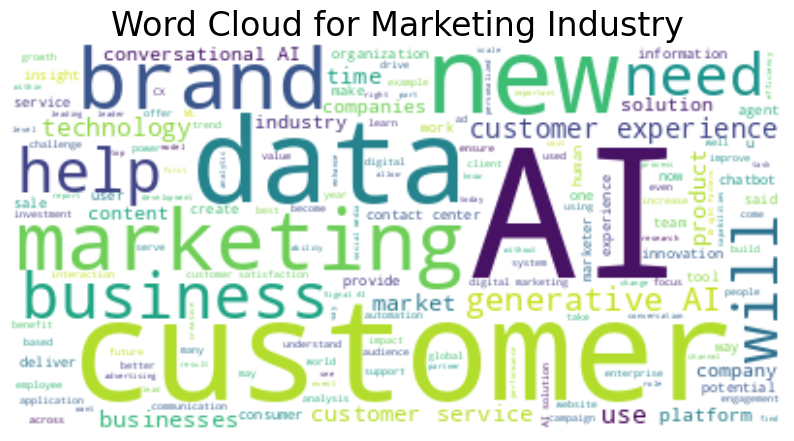

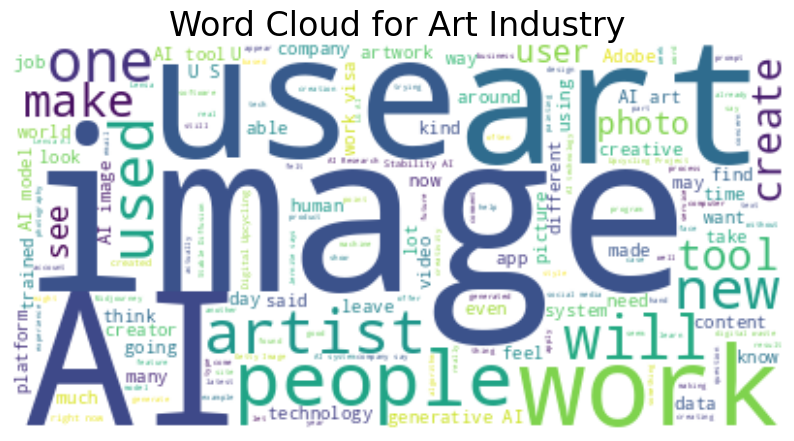

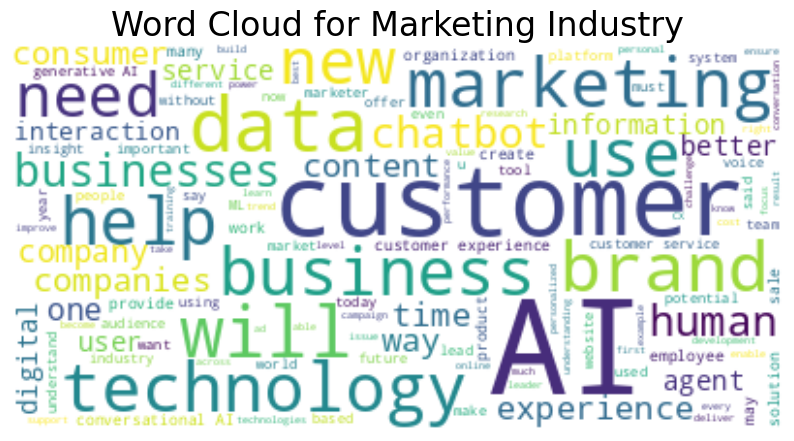

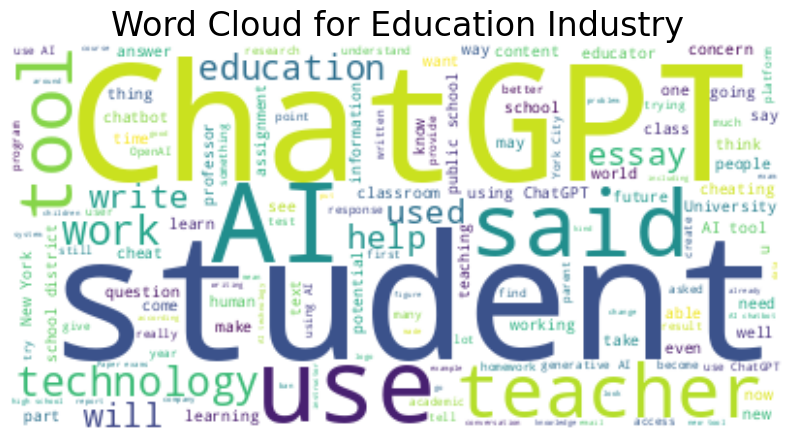

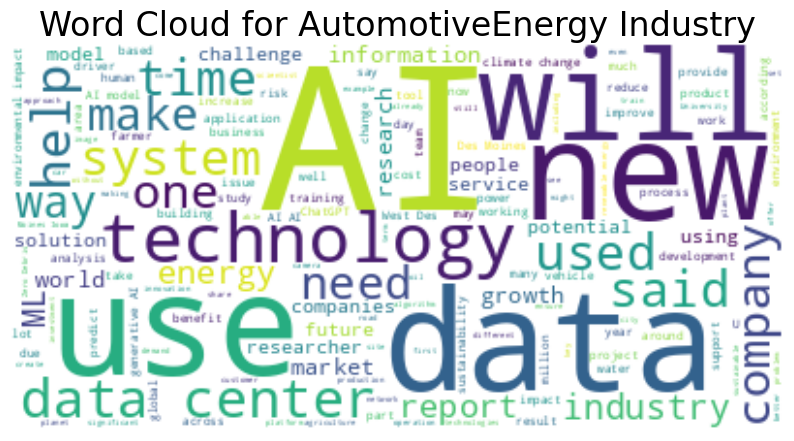

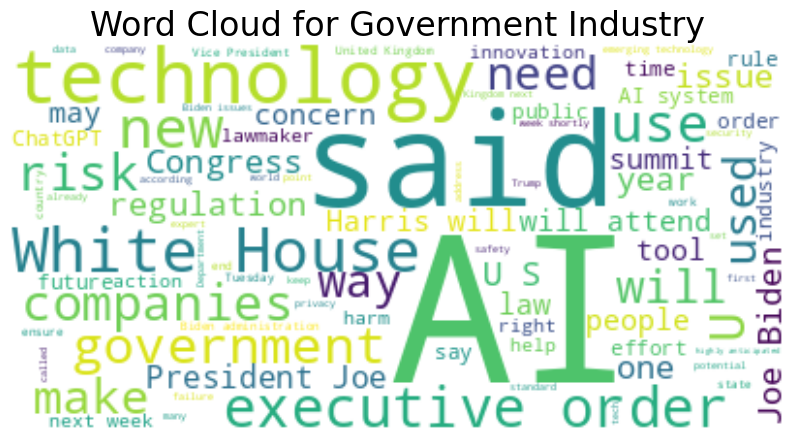

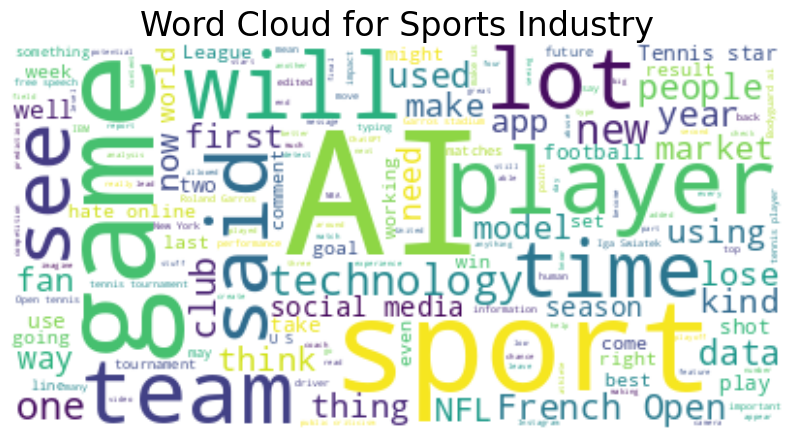

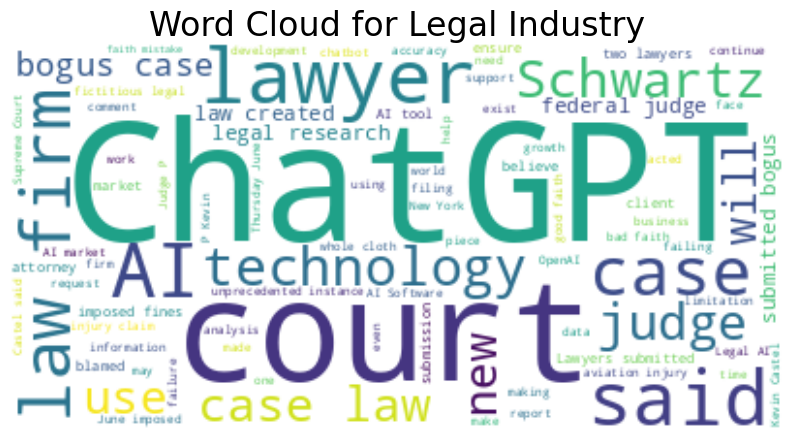

In [42]:
from wordcloud import WordCloud

def generate_word_cloud_for_industry(articles_df, industry_name):
    # Combine all articles' text into one large string
    text = " ".join(article for article in articles_df['cleaned_text'])
    
    # Generate a word cloud image
    wordcloud = WordCloud(background_color="white", max_words=1000).generate(text)
    
    # Display the generated image:
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {industry_name} Industry', fontsize=24)
    plt.show()

# Specify industries for success and failure stories
success_industries = ["Music", "AutomotiveEnergy", "Cybersecurity", "Healthcare", "Marketing"]
failure_industries = ["Art", "Marketing", "Education", "AutomotiveEnergy", "Government", "Sports", "Legal"]

# Generate word clouds for success stories articles
for industry in success_industries:
    if industry in success_articles_by_industry:
        generate_word_cloud_for_industry(success_articles_by_industry[industry], industry)

# Generate word clouds for failure stories articles
for industry in failure_industries:
    if industry in failure_articles_by_industry:
        generate_word_cloud_for_industry(failure_articles_by_industry[industry], industry)


In [6]:
import pandas as pd

# Load entities and articles data
success_entities_df = pd.read_csv("./data/success_entities_all_industries.csv", engine='python')
failure_entities_df = pd.read_csv("./data/failures_entities_all_industries.csv", engine='python')

success_articles_df = pd.read_csv("./data/success_articles_all_industries.csv", engine='python')
failure_articles_df = pd.read_csv("./data/failure_articles_all_industries.csv", engine='python')

# Assuming the top 20 ORG entities are in columns named 'ORG_Entity'
top_20_org_entities_success = success_entities_df['ORG_Entity'].unique()
top_20_org_entities_failure = failure_entities_df['ORG_Entity'].unique()



KeyboardInterrupt



In [ ]:
import joblib

# Load the sentiment analysis model
sentiment_model = joblib.load('./models/best_sentiment_model.joblib')

# Extract the CountVectorizer and the SGDClassifier from the pipeline
vectorizer = sentiment_model.named_steps['countvectorizer']
model = sentiment_model.named_steps['sgdclassifier']


In [ ]:
import pandas as pd
import numpy as np
import spacy
from scipy.special import expit  # For converting decision function to probability

def get_average_sentiment_per_industry(articles_df, top_entities_per_industry, vectorizer, model):
    """
    Calculates the average sentiment for sentences containing top ORG entities, per industry.
    
    Parameters:
    - articles_df: DataFrame containing articles and their industries.
    - top_entities_per_industry: Dictionary mapping industries to their top 20 ORG entities.
    - vectorizer: The CountVectorizer instance.
    - model: The trained sentiment analysis model (SVC).
    
    Returns:
    A dictionary mapping industries to their average sentiment score.
    """
    nlp = spacy.load("en_core_web_md", disable=["parser", "tagger"])
    industry_avg_sentiment = {}
    
    for industry, entities in top_entities_per_industry.items():
        sentiments = []
        industry_articles = articles_df[articles_df['topic_name'] == industry]
        
        for article in industry_articles['cleaned_text']:
            doc = nlp(article)
            for sentence in doc.sents:
                if any(entity in sentence.text for entity in entities):
                    sentence_vect = vectorizer.transform([sentence.text])
                    sentiment_score = model.decision_function(sentence_vect)[0]
                    sentiments.append(sentiment_score)
        
        if sentiments:
            industry_avg_sentiment[industry] = sum(sentiments) / len(sentiments)
        else:
            industry_avg_sentiment[industry] = None  # or a default value, e.g., 0
    
    return industry_avg_sentiment


In [49]:
import matplotlib.pyplot as plt

# Assuming `success_avg_sentiment` and `failure_avg_sentiment` are the outputs from the above function
# for success and failure datasets respectively.

def plot_average_sentiment(industry_avg_sentiment, title):
    industries = list(industry_avg_sentiment.keys())
    sentiments = list(industry_avg_sentiment.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(industries, sentiments, color='skyblue')
    plt.title(title)
    plt.ylabel('Average Sentiment Score')
    plt.xlabel('Industry')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage
# plot_average_sentiment(success_avg_sentiment, 'Average Sentiment for Success Articles by Industry')
# plot_average_sentiment(failure_avg_sentiment, 'Average Sentiment for Failure Articles by Industry')


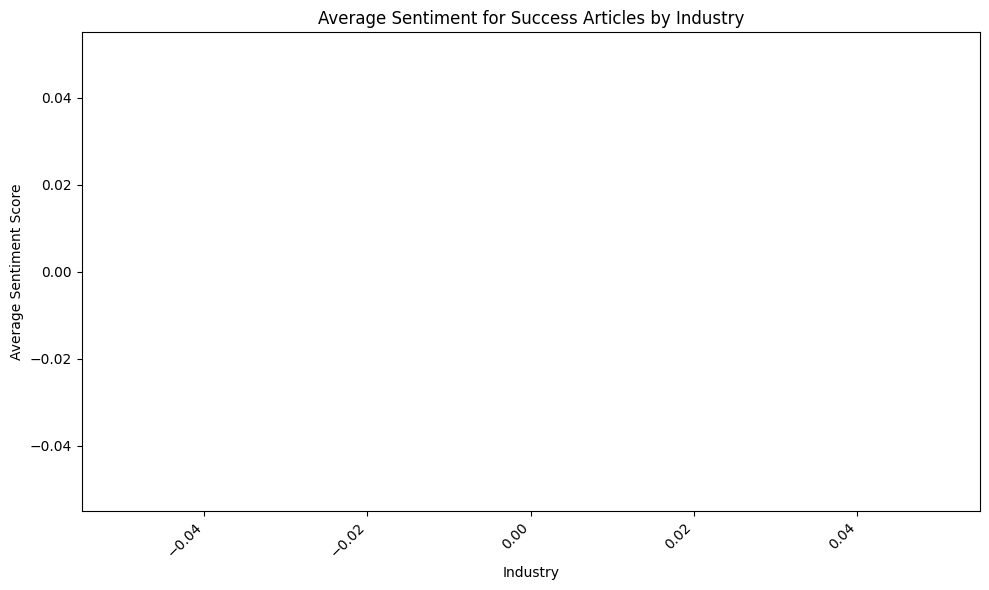

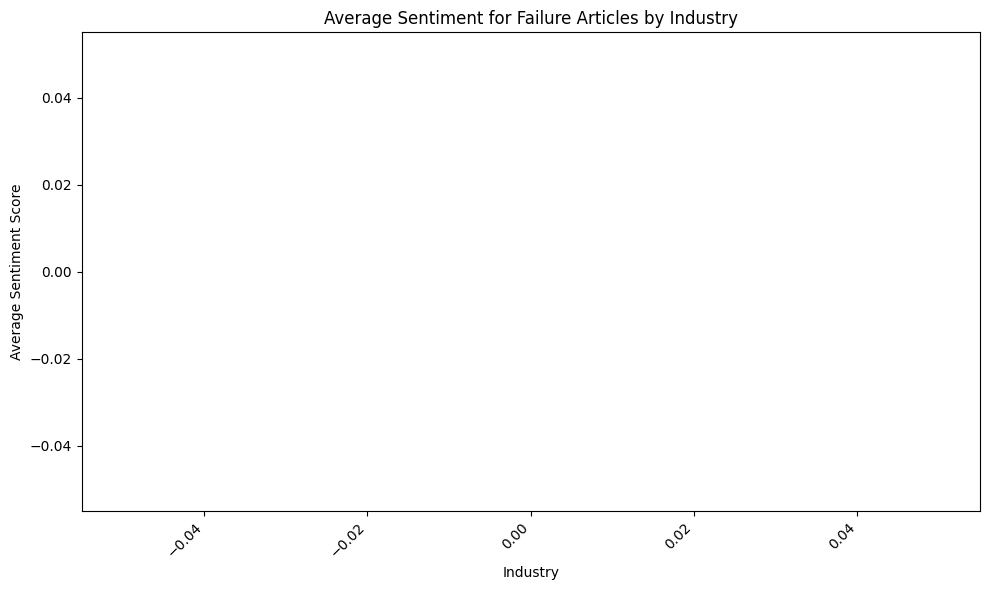

In [50]:
# Assuming 'ORG_Entity' columns exist in both dataframes and contain the top entities
top_entities_per_industry_success = success_entities_df.groupby('Industry')['ORG_Entity'].apply(list).to_dict()
top_entities_per_industry_failure = failure_entities_df.groupby('Industry')['ORG_Entity'].apply(list).to_dict()

# Now calculate the average sentiment
success_avg_sentiment = get_average_sentiment_per_industry(success_articles_df, top_entities_per_industry_success, vectorizer, model)
failure_avg_sentiment = get_average_sentiment_per_industry(failure_articles_df, top_entities_per_industry_failure, vectorizer, model)

plot_average_sentiment(success_avg_sentiment, 'Average Sentiment for Success Articles by Industry')
plot_average_sentiment(failure_avg_sentiment, 'Average Sentiment for Failure Articles by Industry')
